In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
df = pd.read_csv('used_device_data.csv')

In [3]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [5]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [8]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


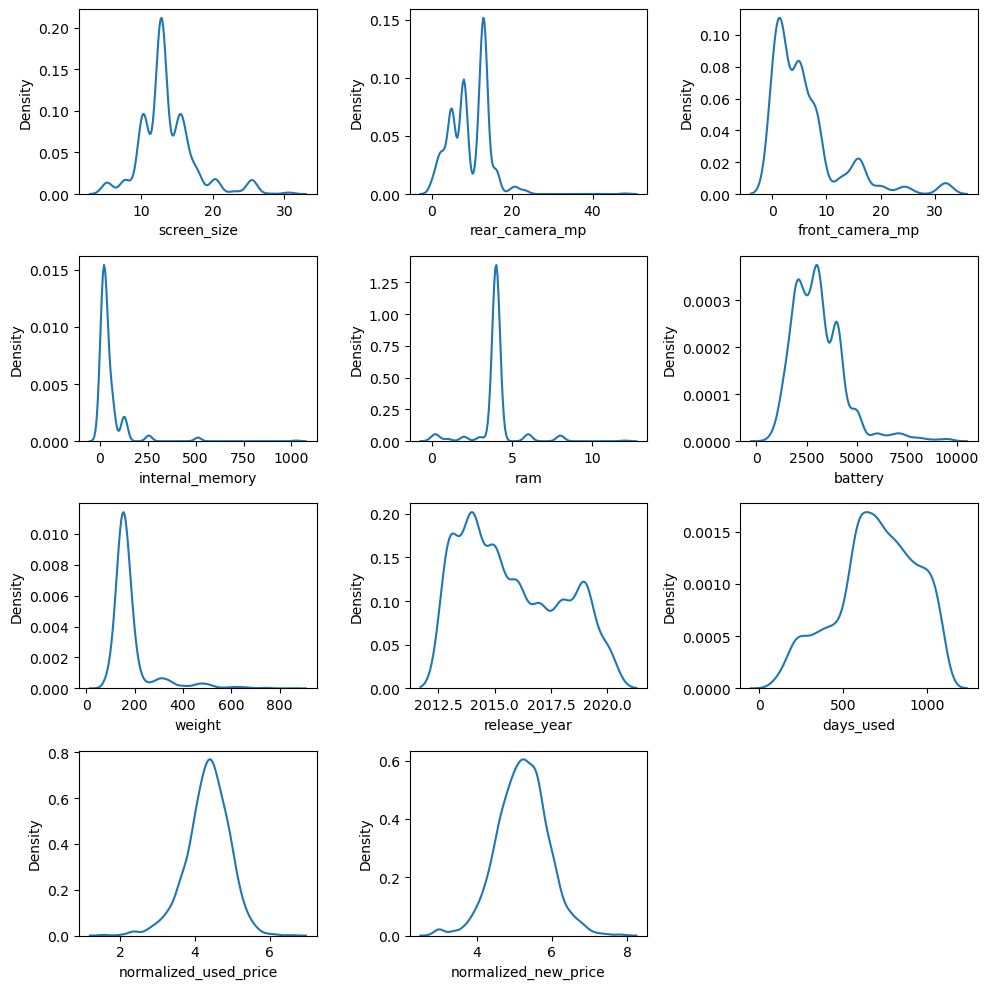

In [9]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

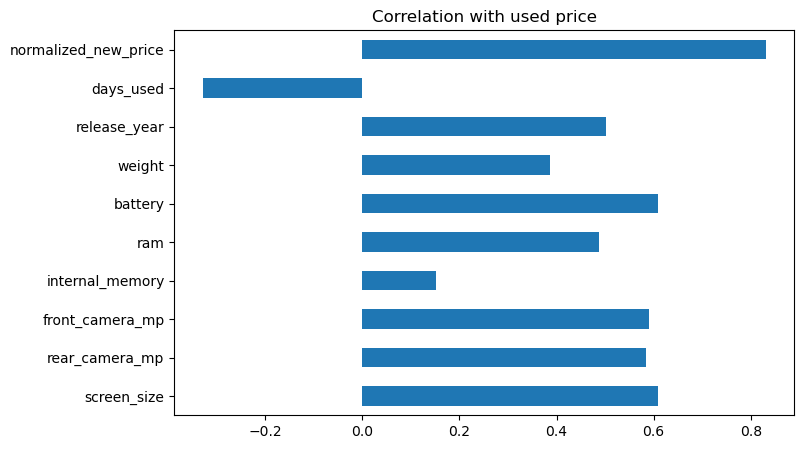

In [10]:
plt.figure(figsize=(8, 5))
X = df.drop('normalized_used_price', axis=1)
X.corr(method='spearman')
X.corrwith(df['normalized_used_price']).plot(kind='barh', title="Correlation with used price")
plt.show()

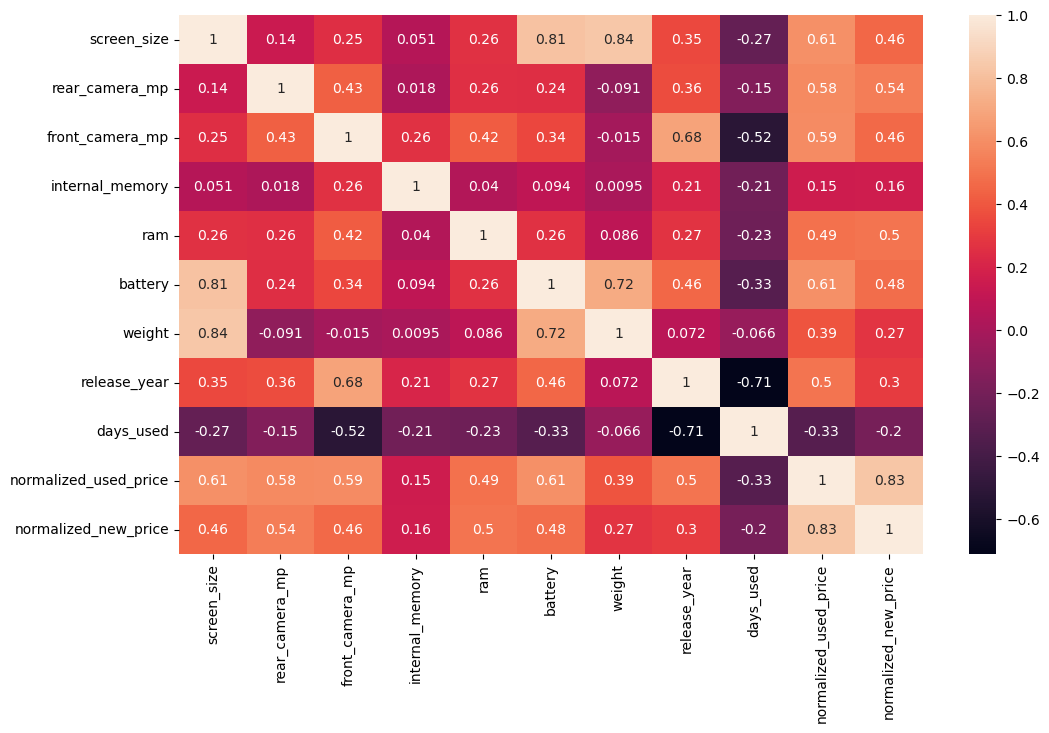

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df_dummies = pd.get_dummies(df)

In [13]:
df_dummies.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,1,0,0,0,0,1,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,1,0,0,0,0,1,0,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,1,0,0,0,0,1,0,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,1,0,0,0,0,1,0,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,1,0,0,0,0,1,1,0


In [21]:
data = df_dummies.drop('normalized_used_price', axis= 1)
target = df_dummies['normalized_used_price']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state = 42)

In [22]:
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.fit_transform(X_test)

In [23]:
print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (2602, 51)
X_test shape: (651, 51)
y_trian shape: (2602,)
y_test shape: (651,)


In [26]:
# Inicjalizacja modeli
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Trenowanie modeli na danych treningowych
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [31]:
# Wydajność modelu regresji liniowej
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_ev = explained_variance_score(y_test, lr_pred)

# Wydajność modelu drzewa decyzyjnego
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_ev = explained_variance_score(y_test, dt_pred)

# Wydajność modelu lasu losowego
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_ev = explained_variance_score(y_test, rf_pred)

In [54]:
print("MSE:\n", "LinearRegression:", lr_mse, "\n","DecisionTreeRegressor" ,dt_mse, "\n","RandomForestRegressor" ,rf_mse, "\n")
print("R2:\n",  "LinearRegression:", lr_r2, "\n","DecisionTreeRegressor" ,dt_r2, "\n","RandomForestRegressor" ,rf_r2, "\n")
print("Explained Variance:\n", "LinearRegression:", lr_ev, "\n","DecisionTreeRegressor" ,dt_ev, "\n","RandomForestRegressor" ,rf_ev, "\n")

# Wybierz najlepszy model
best_model = max([(lr_r2, "Linear Regression"), (dt_r2, "Decision Tree"), (rf_r2, "Random Forest")])
print("Best model:", best_model[1])

MSE:
 LinearRegression: 0.05537407019586381 
 DecisionTreeRegressor 0.11645956435285287 
 RandomForestRegressor 0.05550902497362688 

R2:
 LinearRegression: 0.8570216595071964 
 DecisionTreeRegressor 0.6992961653931385 
 RandomForestRegressor 0.8566732001994756 

Explained Variance:
 LinearRegression: 0.8732622797087883 
 DecisionTreeRegressor 0.709610152863769 
 RandomForestRegressor 0.8631342698473614 

Best model: Linear Regression


In [83]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': lr_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
2457,4.583640,4.572388,0.011252
173,4.911110,5.244751,-0.333641
3143,4.844659,4.880005,-0.035345
1700,4.928123,4.716675,0.211448
1078,3.535145,3.815552,-0.280406


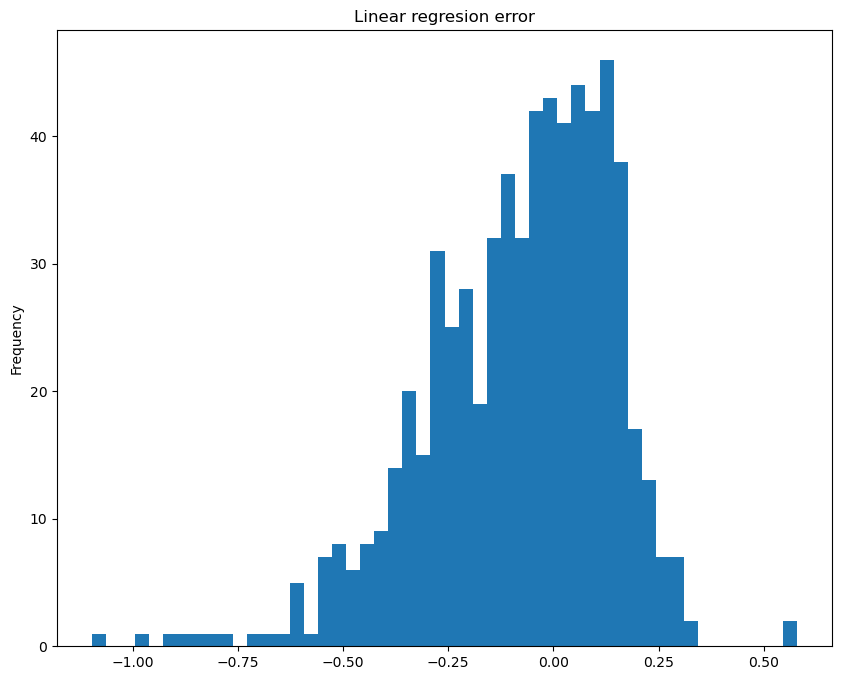

In [81]:
plt.figure(figsize=(10,8))
pr = predictions['error'].plot(kind='hist', bins=50, title="Linear regresion error")

LinearRegression:
R2 of 86%
MSE = 0.055
Explained Variance = 87%